In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy as np

df = pd.read_excel("hotel_data_1.xlsx")
district = []
city = []
price = []

#取出區域
for i in range(len(df["飯店地址"])):
    a = df["飯店地址"][i].split(",")
    for j in a:
        if "區" in j and len(j)<5:
            district.append(j)
#取出城市
for i in range(len(df["飯店地址"])):
    a = df["飯店地址"][i].split(",")
    for j in a:
        if "市" in j and len(j)<5:
            if "新" not in j:
                city.append(j)
#飯店價格
for i in range(len(df["飯店價格"])):
    a = df["飯店價格"][i]
    a = a[4:]
    a = float(a.replace(",",""))
    price.append(a)


# **資料前處理**

In [ ]:
#最近交通站距離 -- 單位為公里
mean_distance = []
for i in range(len(df["附近交通"])):
    b = df["附近交通"][i]
    try:
        b = b.split(",")
        count = 0
        best_distance = 100000
        for j in b:
            count += 1
            if count % 2 == 0:
                if float(j) < best_distance:
                    best_distance = float(j)

    except:
        best_distance = 100000
    mean_distance.append(best_distance)
#景點個數及景點距離
attraction_count = []
attraction_distance = []
for i in range(len(df["附近景點"])):
    b = df["附近景點"][i]
    try:
        b = b.split(",")
        count = 0
        distance = []
        att_count = 0
        for j in b:
            count += 1
            if count % 2 == 0:
                att_count += 1
                distance.append(float(j))
        mean1 = np.mean(distance)
    except:
        mean1 = 0
        att_count = 0
    attraction_distance.append(mean1)
    attraction_count.append(att_count)

In [ ]:
dick = {"地區":district,"城市":city,"價格":price,"景點平均距離":attraction_distance,"附近景點個數":attraction_count,"最近交通站距離":mean_distance}
dick = pd.DataFrame(dick)
df = pd.concat([df,dick], axis=1)
drop_list = []
#把價格為0、景點、交通資訊為空值的資料刪除
for j in range(len(df["價格"])):
    if df["價格"][j] == 0.0:
        drop_list.append(j)
    elif df["景點平均距離"][j] == 0:
        drop_list.append(j)
    elif df["最近交通站距離"][j] == 100000:
        drop_list.append(j)
for k in drop_list:
    df = df.drop(k, axis=0)
df = df.drop("飯店名稱", axis=1)
df = df.drop("飯店地址", axis=1)
df = df.drop("附近景點", axis=1)
df = df.drop("附近交通", axis=1)
df = df.drop("飯店價格", axis=1)

df = df.dropna()
df = df.reset_index()


In [ ]:
#設施整理
fitness = []
restaurant = []
parking = []
full_day = []
swim = [] 
bar = []
spa = []
for i in df["飯店設施"]:
    c = i.split(",")
    fit_boo = False
    rest_boo = False
    park_boo = False
    full_boo = False
    swim_boo = False
    bar_boo = False
    spa_boo = False
    for j in c:
        if "健身房" in j and fit_boo == False:
            fit_boo = True
            fitness.append(1)
        if "餐廳" in j or "早餐" in j:
            if rest_boo == False:
                rest_boo = True
                restaurant.append(1)
        if "停車場" in j and park_boo == False:
            park_boo = True
            parking.append(1)
        if "24小時" in j and full_boo == False:
            full_boo = True
            full_day.append(1)
        if "泳池" in j and swim_boo == False:
            swim_boo = True
            swim.append(1)
        if "酒吧" in j and bar_boo == False:
            bar_boo = True
            bar.append(1)
        if "Spa" in j and spa_boo == False:
            spa_boo = True
            spa.append(1)
    if fit_boo == False:
        fitness.append(0)
    if rest_boo == False:
        restaurant.append(0)
    if park_boo == False:
        parking.append(0)
    if full_boo == False:
        full_day.append(0)
    if swim_boo == False:
        swim.append(0)
    if bar_boo == False:
        bar.append(0)
    if spa_boo == False:
        spa.append(0)
df = df.drop("飯店設施", axis=1)
df = df.drop("index", axis=1)
dick2 = {"健身房":fitness,"餐廳":restaurant,"停車場":parking,"24小時櫃台服務":full_day,"泳池":swim,"酒吧":bar,"spa":spa}
dick2 = pd.DataFrame(dick2)
df = pd.concat([df,dick2], axis=1)

In [ ]:
df

,星級,客房數量,評論數量,總分,整體狀況與整潔度評分,設施與設備評分,位置評分,服務評分,cp值評分,地區,...,景點平均距離,附近景點個數,最近交通站距離,健身房,餐廳,停車場,24小時櫃台服務,泳池,酒吧,spa
0,3.0,16,1884,7.8,7.9,7.2,7.6,8.3,7.9,瑞芳區,...,31.380000,10,3.72,0,0,0,0,0,0,0
1,5.0,235,6609,8.9,9.3,8.7,9.6,9.0,8.4,信義區,...,5.275000,10,0.26,1,0,0,1,0,0,1
2,3.0,5,3384,8.4,8.4,8.0,9.3,8.6,7.9,瑞芳區,...,31.614000,10,3.94,0,0,0,1,0,1,0
3,5.0,745,22836,8.7,8.9,8.4,8.7,8.8,8.7,萬華區,...,6.224000,10,0.27,1,1,1,1,1,0,0
4,2.0,5,1059,8.3,8.8,7.9,8.4,8.6,8.1,瑞芳區,...,31.231000,10,3.60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,3.0,0,240,7.3,6.5,6.2,6.2,6.5,6.1,平鎮區,...,11.673000,10,2.25,0,0,1,1,0,0,1
1929,4.0,190,252,8.0,8.6,8.1,7.8,8.5,7.8,大園區,...,20.488000,10,3.56,1,0,0,1,0,0,1
1930,4.0,0,4,7.3,7.0,7.0,8.0,10.0,7.0,桃園區,...,14.945556,9,0.33,0,0,0,0,0,0,0
1931,3.0,30,96,7.4,7.5,7.0,7.1,7.6,7.8,大溪區,...,11.417000,10,8.18,0,1,1,1,0,0,0


In [ ]:
df.columns

Index(['星級', '客房數量', '評論數量', '總分', '整體狀況與整潔度評分', '設施與設備評分', '位置評分', '服務評分',
       'cp值評分', '地區', '城市', '價格', '景點平均距離', '附近景點個數', '最近交通站距離', '健身房', '餐廳',
       '停車場', '24小時櫃台服務', '泳池', '酒吧', 'spa'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

discret_name = ["地區","城市"]
for i in discret_name:
    transformer = make_column_transformer(
        (OneHotEncoder(sparse=False), [i]),
        remainder='passthrough')

    transformed = transformer.fit_transform(df)
    df = pd.DataFrame(
        transformed, 
        columns=transformer.get_feature_names())



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import statistics
from statistics import mean
y = df["價格"].values
y=y.astype('int')
df = df.drop("價格", axis=1)
x = df.values
print(mean(y))

1855


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=42)
a = df.columns
train_dic = pd.DataFrame(data=X_train,columns=a)
test_dic = pd.DataFrame(data=X_test,columns=a)

scale = preprocessing.StandardScaler()
scale1 = scale.fit(train_dic[['星級', '客房數量', '評論數量', '總分', '整體狀況與整潔度評分', '設施與設備評分', '位置評分', '服務評分',
       'cp值評分', '景點平均距離', '附近景點個數', '最近交通站距離']])
test_dic[['星級', '客房數量', '評論數量', '總分', '整體狀況與整潔度評分', '設施與設備評分', '位置評分', '服務評分',
       'cp值評分', '景點平均距離', '附近景點個數', '最近交通站距離']] = scale1.transform(test_dic[['星級', '客房數量', '評論數量', '總分', '整體狀況與整潔度評分', '設施與設備評分', '位置評分', '服務評分',
       'cp值評分', '景點平均距離', '附近景點個數', '最近交通站距離']])
train_dic[['星級', '客房數量', '評論數量', '總分', '整體狀況與整潔度評分', '設施與設備評分', '位置評分', '服務評分',
       'cp值評分', '景點平均距離', '附近景點個數', '最近交通站距離']] = scale.fit_transform(train_dic[['星級', '客房數量', '評論數量', '總分', '整體狀況與整潔度評分', '設施與設備評分', '位置評分', '服務評分',
       'cp值評分', '景點平均距離', '附近景點個數', '最近交通站距離']])
X_train = train_dic.values
X_test = test_dic.values

y_mean = Y_train.mean()
Y_train = Y_train - y_mean
Y_test = Y_test - y_mean

Y_test = Y_test.astype('float32')
X_test = X_test.astype('float32')


X_subtrain, X_val, Y_subtrain, Y_val = train_test_split(X_train, Y_train, test_size=(1/9), random_state=42)

X_train = X_train.astype('float32')
X_subtrain = X_subtrain.astype('float32')
X_val = X_val.astype('float32')
Y_subtrain = Y_subtrain.astype('float32')
Y_val = Y_val.astype('float32')

print("x_train shape = ",X_train.shape)
print("Y_train shape = ",Y_train.shape)
print("X_subtrain shape = ",X_subtrain.shape)
print("Y_subtrain shape = ",Y_subtrain.shape)
print("X_val shape = ",X_val.shape)
print("Y_val shape = ",Y_val.shape)
print("X_test shape = ",X_test.shape)
print("Y_test shape = ",Y_test.shape)

x_train shape =  (1739, 162)
Y_train shape =  (1739,)
X_subtrain shape =  (1545, 162)
Y_subtrain shape =  (1545,)
X_val shape =  (194, 162)
Y_val shape =  (194,)
X_test shape =  (194, 162)
Y_test shape =  (194,)


In [ ]:
print(X_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 深度學習

In [ ]:
import torch
from torch.utils import data
import pandas as pd

class Dataset(data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, Xnp, Ynp):
        'Initialization, passing Xnp and Ynp'
        self.nobs = Xnp.shape[0]        
        self.Xnp = Xnp
        self.Ynp = Ynp
  def __len__(self):
        'Denotes the total number of samples'
        return self.nobs
  def __getitem__(self, index):
        'Generates one sample of data'        
        X = self.Xnp[index]
        y = self.Ynp[index]
        return X, y
  
trainset = Dataset(X_train, Y_train)    
testset = Dataset(X_test, Y_test)
subtrainset = Dataset(X_subtrain, Y_subtrain)
validset = Dataset(X_val, Y_val)
trainloader = data.DataLoader(trainset, batch_size=50, shuffle=True, num_workers=0)
testloader = data.DataLoader(testset, batch_size=50, shuffle=True, num_workers=0)
subtrainloader = data.DataLoader(subtrainset, batch_size=50, shuffle=True, num_workers=0)
validloader = data.DataLoader(validset, batch_size=50, shuffle=True, num_workers=0)

In [ ]:
class Model(torch.nn.Module):
    def __init__(self,num_i,num_h,num_o):
        super(Model,self).__init__()

        self.linear1 = torch.nn.Linear(num_i,num_h)
        self.relu = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(num_h,num_h)
        self.relu = torch.nn.ReLU()
        self.linear3 = torch.nn.Linear(num_h,num_h)
        self.relu = torch.nn.ReLU()
        self.linear4 = torch.nn.Linear(num_h,num_h)
        self.relu = torch.nn.ReLU()
        self.linear5 = torch.nn.Linear(num_h,num_o)
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        x = self.relu(x)
        x = self.linear4(x)
        x = self.relu(x)
        x = self.linear5(x)
        return x

In [ ]:
def mlp(h,weight):
    D_in = trainset.Xnp.shape[1]
    D_out = 1
    use_cuda = torch.cuda.is_available()
    if use_cuda:
        device = "cuda"   
    else:
        device = "cpu"
    model = Model(D_in,h,D_out)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.000001, momentum=0, weight_decay = weight)
    loss_f = torch.nn.L1Loss(reduction='sum')
    loss_fn = torch.nn.MSELoss(reduction='sum')
    # move the model to device (i.e., cpu or gpu)
    model = model.to(device)
    nepoch = 100
    step_count = 0
    log_interval = 100
    train_mse = []
    valid_mse = []
    batch1 = []
    best_mse = 100000
    best_step_count = 0

    for epoch_id in range(0, nepoch):      
        for batch_idx, (inputs, targets) in enumerate(subtrainloader):
            targets = targets.reshape((-1, 1))
            step_count += 1        

            inputs, targets = inputs.to(device), targets.to(device)
            
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if step_count % log_interval == 0:
                trainmse = 0.0
                validmse = 0.0
                length_train = 0
                length_valid = 0
                for batch_idx, (inputs, targets) in enumerate(subtrainloader):
                    length_train += len(inputs)
                    
                    targets = targets.reshape((-1, 1))
                    inputs, targets = inputs.to(device), targets.to(device)
                    outputs = model(inputs)
                    loss22 = loss_f(outputs, targets)
                    
                    trainmse += loss22
                train_rmse = trainmse.item()/length_train
                train_rmse = math.sqrt(train_rmse)
                train_mse.append(train_rmse)
                for batch_idx, (data, labels) in enumerate(validloader):
                    length_valid += len(data)
                    labels = labels.reshape((-1, 1))
                    data, labels = data.to(device), labels.to(device)
                    valid_output = model(data)
                    loss33 = loss_fn(valid_output, labels)
                    validmse += loss33
                valid_rmse = validmse.item()/length_valid
                valid_rmse = math.sqrt(valid_rmse)
                # print(f'Epoch {epoch_id+1} \t\tstep {step_count} \t\tTraining Loss: {train_rmse}\t\tValidation Loss: {valid_rmse}')
                valid_mse.append(valid_rmse)
                batch1.append(step_count)
                if valid_rmse < best_mse:
                    best_mse = valid_rmse
                    best_step_count = step_count
                    torch.save(model.state_dict(), 'saved_model.pth')
                    # print(model.state_dict())
            if (step_count - best_step_count) >= 5000:
                break
        else:
            continue
        break
    model.load_state_dict(torch.load('saved_model.pth'))
    model.eval()
    length_test = 0
    testmse = 0.0
    for batch_idx, (data, labels) in enumerate(testloader):
        length_test += len(data)
        labels = labels.reshape((-1, 1))
        data, labels = data.to(device), labels.to(device)
        test_output = model(data)
        loss33 = loss_fn(test_output, labels)
        testmse += loss33
    test_rmse = testmse.item()/length_test
    test_rmse = math.sqrt(test_rmse)
    return test_rmse

In [ ]:
rmse_45_1 = mlp(45,0.1)
rmse_45_2 = mlp(45,0.2)
rmse_45_4 = mlp(45,0.4)

rmse_90_1 = mlp(90,0.1)
rmse_90_2 = mlp(90,0.2)
rmse_90_4 = mlp(90,0.4)

rmse_160_1 = mlp(160,0.1)
rmse_160_2 = mlp(160,0.2)
rmse_160_4 = mlp(160,0.4)

In [ ]:
import pandas as pd
frame = {
    " ": ["H = 45","H = 90","H = 160"],
    "Weight = 0.1": [rmse_45_1, rmse_45_2, rmse_45_4],
    "Weight = 0.2": [rmse_90_1, rmse_90_2, rmse_90_4],
    "Weight = 0.4": [rmse_160_1, rmse_160_2, rmse_160_4],

}
frame = pd.DataFrame(frame)
frame

,,Weight = 0.1,Weight = 0.2,Weight = 0.4
0,H = 45,1711.077408,1711.237233,1711.201182
1,H = 90,1711.235112,1711.207544,1710.050822
2,H = 160,1711.265668,1708.930961,1710.050822


In [ ]:
class Model_drop(torch.nn.Module):
    def __init__(self,num_i,num_h,num_o):
        super(Model_drop,self).__init__()

        self.layers = torch.nn.Sequential(
        torch.nn.Linear(num_i,num_h),
        torch.nn.ReLU(),      
        torch.nn.Dropout(p=0.5),
        torch.nn.Linear(num_h,num_h),
        torch.nn.ReLU(),      
        torch.nn.Dropout(p=0.5),
        torch.nn.Linear(num_h,num_h),
        torch.nn.ReLU(),      
        torch.nn.Dropout(p=0.5),
        torch.nn.Linear(num_h,num_h),
        torch.nn.ReLU(),      
        torch.nn.Dropout(p=0.5),
        torch.nn.Linear(num_h, num_o)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
def mlp_drop(h):
    D_in = trainset.Xnp.shape[1]
    D_out = 1
    use_cuda = torch.cuda.is_available()
    if use_cuda:
        device = "cuda"   
    else:
        device = "cpu"
    model = Model_drop(D_in,h,D_out)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.00001,weight_decay =0)
    loss_fn = torch.nn.MSELoss(reduction='sum')
    # move the model to device (i.e., cpu or gpu)
    model = model.to(device)
    nepoch = 100
    step_count = 0
    log_interval = 100
    train_mse = []
    valid_mse = []
    batch1 = []
    best_mse = 100000
    best_step_count = 0

    for epoch_id in range(0, nepoch):      
        for batch_idx, (inputs, targets) in enumerate(subtrainloader):
            targets = targets.reshape((-1, 1))
            step_count += 1        

            inputs, targets = inputs.to(device), targets.to(device)
            
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if step_count % log_interval == 0:
                trainmse = 0.0
                validmse = 0.0
                length_train = 0
                length_valid = 0
                for batch_idx, (inputs, targets) in enumerate(subtrainloader):
                    length_train += len(inputs)
                    targets = targets.reshape((-1, 1))
                    inputs, targets = inputs.to(device), targets.to(device)
                    outputs = model(inputs)
                    loss22 = loss_fn(outputs, targets)
                    trainmse += loss22
                train_rmse = trainmse.item()/length_train
                train_rmse = math.sqrt(train_rmse)
                train_mse.append(train_rmse)
                for batch_idx, (data, labels) in enumerate(validloader):
                    length_valid += len(data)
                    labels = labels.reshape((-1, 1))
                    data, labels = data.to(device), labels.to(device)
                    valid_output = model(data)
                    loss33 = loss_fn(valid_output, labels)
                    validmse += loss33
                valid_rmse = validmse.item()/length_valid
                valid_rmse = math.sqrt(valid_rmse)
                # print(f'Epoch {epoch_id+1} \t\tstep {step_count} \t\tTraining Loss: {train_rmse}\t\tValidation Loss: {valid_rmse}')
                valid_mse.append(valid_rmse)
                batch1.append(step_count)
                if valid_rmse < best_mse:
                    best_mse = valid_rmse
                    best_step_count = step_count
                    torch.save(model.state_dict(), 'saved_model.pth')
                    # print(model.state_dict())
            if (step_count - best_step_count) >= 5000:
                break
        else:
            continue
        break
    model.load_state_dict(torch.load('saved_model.pth'))
    model.eval()
    length_test = 0
    testmse = 0.0
    for batch_idx, (data, labels) in enumerate(testloader):
        length_test += len(data)
        labels = labels.reshape((-1, 1))
        data, labels = data.to(device), labels.to(device)
        test_output = model(data)
        loss33 = loss_fn(test_output, labels)
        testmse += loss33
    test_rmse = testmse.item()/length_test
    test_rmse = math.sqrt(test_rmse)
    return test_rmse, train_mse, valid_mse,batch1

In [ ]:
t_rmse, train_list, valid_list, batch_list = mlp_drop(90)
t_rmse_20, train_list_20, valid_list_20, batch_list_20 = mlp_drop(20)
t_rmse_45, train_list_45, valid_list_45, batch_list_45 = mlp_drop(45)
t_rmse_180, train_list_180, valid_list_180, batch_list_180 = mlp_drop(180)
t_rmse_360, train_list_360, valid_list_360, batch_list_360 = mlp_drop(360)
print("H = 20, test RMSE = ",t_rmse_20)
print("H = 45, test RMSE = ",t_rmse_45)
print("H = 90 test RMSE = ", t_rmse)
print("H = 180, test RMSE = ",t_rmse_180)
print("H = 360, test RMSE = ",t_rmse_360)

H = 20, test RMSE =  1711.278680300051
H = 45, test RMSE =  1711.2765597405717
H = 90 test RMSE =  1711.2741500107004
H = 180, test RMSE =  1711.1716851568326
H = 360, test RMSE =  1697.1126480602827


In [ ]:
def losfinction(out,tar,z):
    lossfn1 = torch.nn.MSELoss(reduction='sum')
    lossfn2 = torch.nn.L1Loss(reduction='sum')
    loo = (z*lossfn1(out,tar) + (1-z)*lossfn2(out,tar))
    return loo
def mlp_drop_q7(h,z):
    D_in = trainset.Xnp.shape[1]
    D_out = 1
    use_cuda = torch.cuda.is_available()
    if use_cuda:
        device = "cuda"   
    else:
        device = "cpu"
    model = Model_drop(D_in,h,D_out)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001,weight_decay =0)
    loss_fn = torch.nn.MSELoss(reduction='sum')
    # move the model to device (i.e., cpu or gpu)
    model = model.to(device)
    nepoch = 100
    step_count = 0
    log_interval = 100
    train_mse = []
    valid_mse = []
    batch1 = []
    best_mse = 100000
    best_step_count = 0

    for epoch_id in range(0, nepoch):      
        for batch_idx, (inputs, targets) in enumerate(subtrainloader):
            targets = targets.reshape((-1, 1))
            step_count += 1        

            inputs, targets = inputs.to(device), targets.to(device)
            
            outputs = model(inputs)
            loss = losfinction(outputs, targets,z)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if step_count % log_interval == 0:
                trainmse = 0.0
                validmse = 0.0
                length_train = 0
                length_valid = 0
                for batch_idx, (inputs, targets) in enumerate(subtrainloader):
                    length_train += len(inputs)
                    targets = targets.reshape((-1, 1))
                    inputs, targets = inputs.to(device), targets.to(device)
                    outputs = model(inputs)
                    loss22 = loss_fn(outputs, targets)
                    trainmse += loss22
                train_rmse = trainmse.item()/length_train
                train_rmse = math.sqrt(train_rmse)
                train_mse.append(train_rmse)
                for batch_idx, (data, labels) in enumerate(validloader):
                    length_valid += len(data)
                    labels = labels.reshape((-1, 1))
                    data, labels = data.to(device), labels.to(device)
                    valid_output = model(data)
                    loss33 = loss_fn(valid_output, labels)
                    validmse += loss33
                valid_rmse = validmse.item()/length_valid
                valid_rmse = math.sqrt(valid_rmse)
                # print(f'Epoch {epoch_id+1} \t\tstep {step_count} \t\tTraining Loss: {train_rmse}\t\tValidation Loss: {valid_rmse}')
                valid_mse.append(valid_rmse)
                batch1.append(step_count)
                if valid_rmse < best_mse:
                    best_mse = valid_rmse
                    best_step_count = step_count
                    torch.save(model.state_dict(), 'saved_model.pth')
                    # print(model.state_dict())
            if (step_count - best_step_count) >= 5000:
                break
        else:
            continue
        break
    model.load_state_dict(torch.load('saved_model.pth'))
    model.eval()
    length_test = 0
    testmse = 0.0
    for batch_idx, (data, labels) in enumerate(testloader):
        length_test += len(data)
        labels = labels.reshape((-1, 1))
        data, labels = data.to(device), labels.to(device)
        test_output = model(data)
        loss33 = loss_fn(test_output, labels)
        testmse += loss33
    test_rmse = testmse.item()/length_test
    test_rmse = math.sqrt(test_rmse)
    return test_rmse, train_mse, valid_mse,batch1

In [ ]:
t_rmse_5, train_list_5, valid_list_5, batch_list_5 = mlp_drop_q7(90,0.5)
t_rmse_0, train_list_0, valid_list_0, batch_list_0 = mlp_drop_q7(90,0.0)
t_rmse_01, train_list_01, valid_list_01, batch_list_01 = mlp_drop_q7(90,0.1)
t_rmse_9, train_list_9, valid_list_9, batch_list_9 = mlp_drop_q7(90,0.9)
t_rmse_1, train_list_1, valid_list_1, batch_list_1 = mlp_drop_q7(90,1)
print("z = 0, test RMSE = ",t_rmse_0)
print("z = 0.1, test RMSE = ",t_rmse_01)
print("z = 0.5, test RMSE = ",t_rmse_5)
print("z = 0.9, test RMSE = ",t_rmse_9)
print("z = 1, test RMSE = ",t_rmse_1)

z = 0, test RMSE =  1446.75574495732
z = 0.1, test RMSE =  2152.1389599867343
z = 0.5, test RMSE =  1930.5423627657046
z = 0.9, test RMSE =  2313.873318044608
z = 1, test RMSE =  2441.570020488549


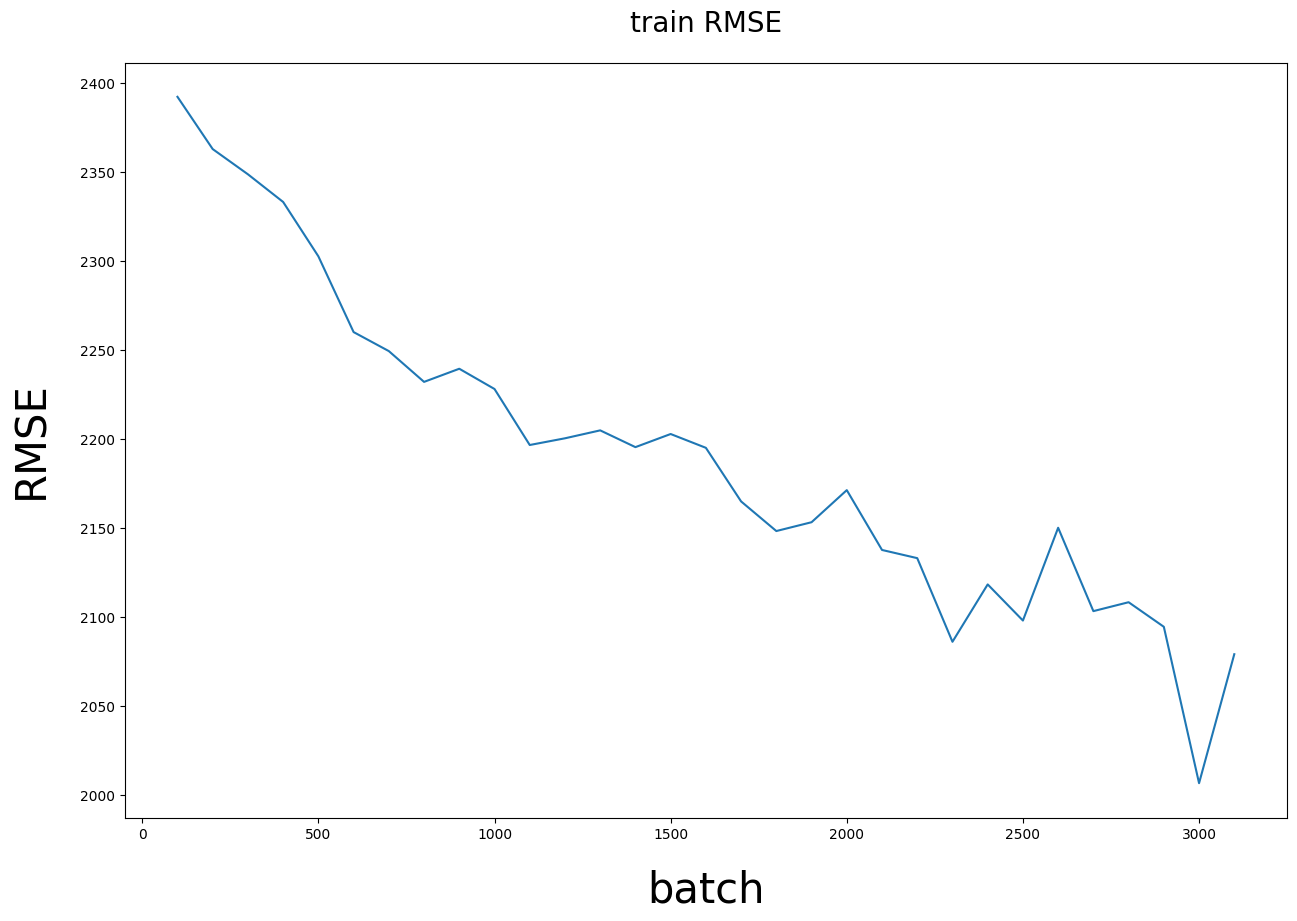

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10),dpi=100,linewidth = 2)
plt.plot(batch_list_0,train_list_0)
plt.title("train RMSE", fontsize=20,x=0.5, y=1.03)
plt.ylabel("RMSE", fontsize=30, labelpad = 20)
plt.xlabel("batch", fontsize=30, labelpad = 20)
plt.show()

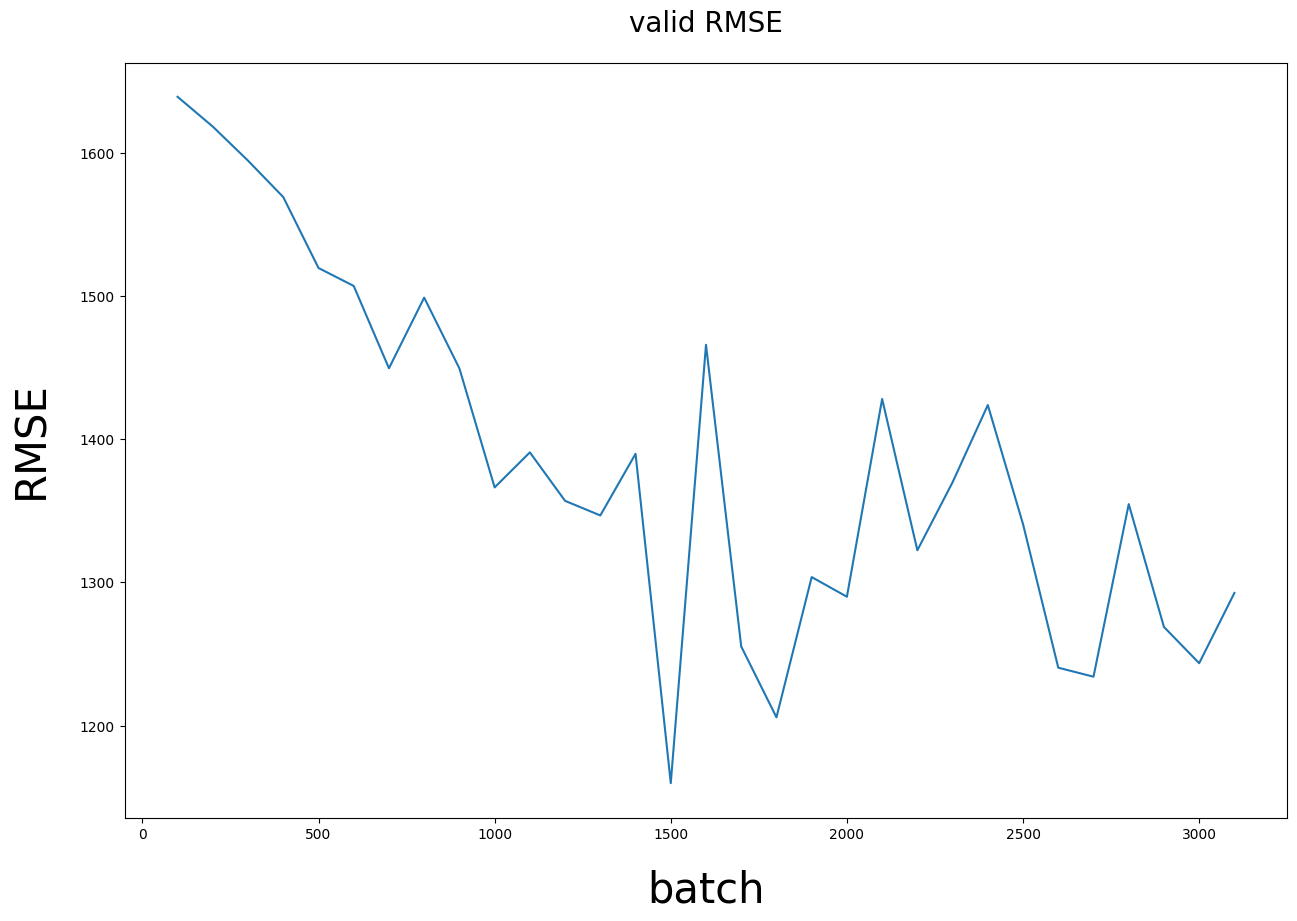

In [ ]:
plt.figure(figsize=(15,10),dpi=100,linewidth = 2)
plt.plot(batch_list_0,valid_list_0)
plt.title("valid RMSE", fontsize=20,x=0.5, y=1.03)
plt.ylabel("RMSE", fontsize=30, labelpad = 20)
plt.xlabel("batch", fontsize=30, labelpad = 20)
plt.show()

In [ ]:
def loss_function(out,tar,z):
    q = 0.5
    a_plus = (tar - out)
    for i in range(len(a_plus)):
        if a_plus[i] < 0:
            a_plus[i] = 0
    a_minus =  (out - tar)
    for j in range(len(a_minus)):
        if a_minus[j] < 0:
            a_minus[j] = 0
    qloss = (q*torch.sum(a_plus) + (1-q)*torch.sum(a_minus))
    Mloss = torch.nn.MSELoss(reduction='sum')
    loss__ = (z*Mloss(out,tar) + (1-z)*qloss)
    return loss__
def mlp_drop_q8(h,z):
    D_in = trainset.Xnp.shape[1]
    D_out = 1
    use_cuda = torch.cuda.is_available()
    if use_cuda:
        device = "cuda"   
    else:
        device = "cpu"
    model = Model_drop(D_in,h,D_out)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001,weight_decay =0)
    loss_fn = torch.nn.MSELoss(reduction='sum')
    # move the model to device (i.e., cpu or gpu)
    model = model.to(device)
    nepoch = 100
    step_count = 0
    log_interval = 100
    train_mse = []
    valid_mse = []
    batch1 = []
    best_mse = 100000
    best_step_count = 0

    for epoch_id in range(0, nepoch):      
        for batch_idx, (inputs, targets) in enumerate(subtrainloader):
            targets = targets.reshape((-1, 1))
            step_count += 1        

            inputs, targets = inputs.to(device), targets.to(device)
            
            outputs = model(inputs)
            loss = loss_function(outputs, targets,z)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if step_count % log_interval == 0:
                trainmse = 0.0
                validmse = 0.0
                length_train = 0
                length_valid = 0
                for batch_idx, (inputs, targets) in enumerate(subtrainloader):
                    length_train += len(inputs)
                    targets = targets.reshape((-1, 1))
                    inputs, targets = inputs.to(device), targets.to(device)
                    outputs = model(inputs)
                    loss22 = loss_fn(outputs, targets)
                    trainmse += loss22
                train_rmse = trainmse.item()/length_train
                train_rmse = math.sqrt(train_rmse)
                train_mse.append(train_rmse)
                for batch_idx, (data, labels) in enumerate(validloader):
                    length_valid += len(data)
                    labels = labels.reshape((-1, 1))
                    data, labels = data.to(device), labels.to(device)
                    valid_output = model(data)
                    loss33 = loss_fn(valid_output, labels)
                    validmse += loss33
                valid_rmse = validmse.item()/length_valid
                valid_rmse = math.sqrt(valid_rmse)
                # print(f'Epoch {epoch_id+1} \t\tstep {step_count} \t\tTraining Loss: {train_rmse}\t\tValidation Loss: {valid_rmse}')
                valid_mse.append(valid_rmse)
                batch1.append(step_count)
                if valid_rmse < best_mse:
                    best_mse = valid_rmse
                    best_step_count = step_count
                    torch.save(model.state_dict(), 'saved_model.pth')
                    # print(model.state_dict())
            if (step_count - best_step_count) >= 5000:
                break
        else:
            continue
        break
    model.load_state_dict(torch.load('saved_model.pth'))
    model.eval()
    length_test = 0
    testmse = 0.0
    for batch_idx, (data, labels) in enumerate(testloader):
        length_test += len(data)
        labels = labels.reshape((-1, 1))
        data, labels = data.to(device), labels.to(device)
        test_output = model(data)
        loss33 = loss_fn(test_output, labels)
        testmse += loss33
    test_rmse = testmse.item()/length_test
    test_rmse = math.sqrt(test_rmse)
    return test_rmse, train_mse, valid_mse,batch1

In [ ]:
t_rmse_0, train_list_0, valid_list_0, batch_list_0 = mlp_drop_q8(90,0)
t_rmse_01, train_list_01, valid_list_01, batch_list_01 = mlp_drop_q8(90,0.1)
t_rmse_5, train_list_5, valid_list_5, batch_list_5 = mlp_drop_q8(90,0.5)
t_rmse_9, train_list_9, valid_list_9, batch_list_9 = mlp_drop_q8(90,0.9)
t_rmse_1, train_list_1, valid_list_1, batch_list_1 = mlp_drop_q8(90,1)
print("z = 0, test RMSE = ",t_rmse_0)
print("z = 0.1, test RMSE = ",t_rmse_01)
print("z = 0.5, test RMSE = ",t_rmse_5)
print("z = 0.9, test RMSE = ",t_rmse_9)
print("z = 1, test RMSE = ",t_rmse_1)

z = 0, test RMSE =  1312.0440022794685
z = 0.1, test RMSE =  2320.865107101407
z = 0.5, test RMSE =  1787.74448692073
z = 0.9, test RMSE =  2259.7983670659237
z = 1, test RMSE =  1899.525713999242


# 參數萃取

In [ ]:
X_subtrain, X_val, Y_subtrain, Y_val = train_test_split(X_train, Y_train, test_size=(1/9), random_state=42)

X_train = X_train.astype('float32')
X_subtrain = X_subtrain.astype('float32')
X_val = X_val.astype('float32')
Y_train = Y_train.astype('int')
Y_subtrain = Y_subtrain.astype('int')
Y_val = Y_val.astype('int')

print("x_train shape = ",X_train.shape)
print("Y_train shape = ",Y_train.shape)
print("X_subtrain shape = ",X_subtrain.shape)
print("Y_subtrain shape = ",Y_subtrain.shape)
print("X_val shape = ",X_val.shape)
print("Y_val shape = ",Y_val.shape)
print("X_test shape = ",X_test.shape)
print("Y_test shape = ",Y_test.shape)

x_train shape =  (1739, 162)
Y_train shape =  (1739,)
X_subtrain shape =  (1545, 162)
Y_subtrain shape =  (1545,)
X_val shape =  (194, 162)
Y_val shape =  (194,)
X_test shape =  (194, 162)
Y_test shape =  (194,)


In [ ]:
#先篩選出不同功能的資料集
import numpy as np
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
grid_c = []
f1_result = []
accuracy = []
bestc = 0
best_rmse = 10000000000000000000000000000000
grid_c = [0.05,0.2,0.5,1,2,4,8,16,32,64]
for i in range(10):
    logic5 = LogisticRegression(penalty = 'l2', max_iter = 900, C=grid_c[i])
    logic5.fit(X_train, Y_train)
    ypred = logic5.predict(X_val)

    my = Y_val.shape[0]
    rmse = 0
    for j in range(my):
      rmse += (ypred[j]-Y_val[j])**2
    if rmse < best_rmse:
      best_rmse = rmse
      bestc = grid_c[i]

print(bestc)

64


In [ ]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
X_trainvalid = np.concatenate((X_train, X_val))
y_trainvalid = np.concatenate((Y_train, Y_val))
logic6 = LogisticRegression(penalty = 'l2', max_iter = 1000,  C=32)
logic6.fit(X_trainvalid, y_trainvalid)

ypred = logic6.predict(X_test)
ypred
print(ypred, Y_test)
print(ypred[30:40], Y_test[30:40])


[ 1416  -765  -280  -575 -1295  -774   935 -1367 -1038  -687   481  -713
   290 -1432  -685 -1092   204 -1207  -609 -1014 -1207  -341  -999 -1179
  -228  -557 -1077  -557   750  -391  -471   807  -623 -1194  1087   117
   670 -1466 -1207   180  -469  -280  -574    12  -754  -661  -492  -298
   111   124  -956  -401  -399  -142 -1466 -1267  -372   670 -1052   809
  3145 -1250 -1014   -45   221  -134  -700   736    -5 -1267  -774 -1207
 -1233 -1501  -644  -235   -46  -320  -990   117 -1077    48  -687  -904
  -178 -1288   330  -703  5857  -488  -488  -313  1288 -1087  -807  -488
  -485  -514  1005    48  -178   308 -1337  -661   750 -1506  -454   299
   377  -744 -1172 -1583   486  -609   914   204   308  -904  -391  -315
  -211   567   -38 -1233 -1267  -401   -56  -813 -1388 -1142 -1207  -384
  1005  1793  -315   978 -1432   281  -315  -629 -1009  -142  -971  -817
  -753   425  -523  9687    36  -211  -315  -135  -548 -1466   425   -38
   238    29    75  -399  -401  1000   567 -1371  -

In [ ]:
rmse = 0
my2 = Y_test.shape[0]
for j in range(my2):
    rmse += (ypred[j]-Y_test[j])**2
rmse = (rmse/my2)**(1/2)
print(rmse)
highindex = np.argsort(np.absolute(logic6.coef_))[0][-30:]
indexall = df.columns.tolist()
print(indexall)

highindex = highindex.tolist()
highindex = list(reversed(highindex))

top30_data=[]
top30_coef = []
for i in range(len(highindex)):
  top30_data.append(indexall[highindex[i]])
  top30_coef.append(logic6.coef_[0][highindex[i]])
for i in range(30):
  print(f'{i+1}:{top30_data[i]}、係數{top30_coef[i]}')

pd.DataFrame(data=top30_coef, index=top30_data).head(30).T

1736.266597187223
['onehotencoder__x0_ 台中市', 'onehotencoder__x0_ 台北市', 'onehotencoder__x0_ 台南市', 'onehotencoder__x0_ 桃園市', 'onehotencoder__x0_ 高雄市', 'onehotencoder__x0_台南市', 'onehotencoder__x0_ 七股區', 'onehotencoder__x0_ 三峽區', 'onehotencoder__x0_ 三民區', 'onehotencoder__x0_ 三芝區', 'onehotencoder__x0_ 三重區', 'onehotencoder__x0_ 中區', 'onehotencoder__x0_ 中和區', 'onehotencoder__x0_ 中壢區', 'onehotencoder__x0_ 中山區', 'onehotencoder__x0_ 中正區', 'onehotencoder__x0_ 中西區', 'onehotencoder__x0_ 仁德區', 'onehotencoder__x0_ 信義區', 'onehotencoder__x0_ 內湖區', 'onehotencoder__x0_ 前金區', 'onehotencoder__x0_ 前鎮區', 'onehotencoder__x0_ 北區', 'onehotencoder__x0_ 北屯區', 'onehotencoder__x0_ 北投區', 'onehotencoder__x0_ 南區', 'onehotencoder__x0_ 南屯區', 'onehotencoder__x0_ 南港區', 'onehotencoder__x0_ 后里區', 'onehotencoder__x0_ 和平區', 'onehotencoder__x0_ 善化區', 'onehotencoder__x0_ 土城區', 'onehotencoder__x0_ 士林區', 'onehotencoder__x0_ 大同區', 'onehotencoder__x0_ 大園區', 'onehotencoder__x0_ 大安區', 'onehotencoder__x0_ 大樹區', 'onehotencoder__x0_ 大溪區

,附近景點個數,onehotencoder__x0_ 東區,健身房,服務評分,總分,設施與設備評分,onehotencoder__x0_ 台中市,24小時櫃台服務,整體狀況與整潔度評分,位置評分,...,onehotencoder__x0_ 台北市,餐廳,星級,onehotencoder__x0_ 西屯區,onehotencoder__x0_ 桃園市,onehotencoder__x0_中西區,onehotencoder__x0_ 新興區,onehotencoder__x0_ 西區,onehotencoder__x0_ 桃園區,onehotencoder__x0_ 中壢區
0,-2.315675,2.033072,1.975394,-1.558878,1.505679,-1.490022,1.272641,-0.973801,-0.968575,-0.939468,...,-0.28318,-0.260352,0.200732,-0.197084,-0.130371,-0.123543,-0.073279,-0.058428,-0.058205,-0.050192


In [ ]:
allindex = list(range(0,163))
# 萃取重要FEATURE
x_train = []
for i in range(15):
  x_train.append(X_train[:,highindex[i]].tolist())
x_train = np.asarray(x_train)
x_train = x_train.T
print(x_train.shape)
x_val = []
for i in range(15):
  x_val.append(X_val[:,highindex[i]].tolist())
x_val = np.asarray(x_val)
x_val = x_val.T
print(x_val.shape)
x_test = []
for i in range(15):
  x_test.append(X_test[:,highindex[i]].tolist())
x_test = np.asarray(x_test)
x_test = x_test.T
print(x_test.shape)

(1739, 15)
(194, 15)
(194, 15)


In [ ]:
#先篩選出不同功能的資料集
import numpy as np
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

grid_c = []
f1_result = []
accuracy = []
bestc = 0
best_rmse = 10000000000000000000000000000000
grid_c = [0.05,0.2,0.5,1,2,4,8,16,32,64]
for i in range(10):
    logic5 = LogisticRegression(penalty = 'l2', max_iter = 1000, C=grid_c[i])
    logic5.fit(x_train, Y_train)
    ypred = logic5.predict(x_val)

    my = Y_val.shape[0]
    rmse = 0
    for j in range(my):
      rmse += (ypred[j]-Y_val[j])**2
    rmse = (rmse/my)**(1/2)
    print(f'{grid_c[i]}: {rmse}')
    if rmse < best_rmse:
      best_rmse = rmse
      bestc = grid_c[i]

print(bestc)

0.05: 1617.6092228774364
0.2: 1537.5937068083022
0.5: 1497.521479803955
1: 825.7301892027593
2: 749.9523593116521
4: 638.912893567668
8: 611.0079596896621
16: 558.4208727599826
32: 495.3130323340988
64: 470.2512763263891
64


In [ ]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
X_trainvalid = np.concatenate((x_train, x_val))
y_trainvalid = np.concatenate((Y_train, Y_val))
logic6 = LogisticRegression(penalty = 'l2', max_iter = 1000,  C=bestc)
logic6.fit(X_trainvalid, y_trainvalid)

ypred = logic6.predict(x_test)
ypred
print(ypred, Y_test)
print(ypred[30:40], Y_test[30:40])

[  993 -1337   807  -504 -1172 -1099   808 -1323   100   -45  1520  -182
  -152 -1323  -662  -342  3194 -1545  -306  -672  -922  -342  -427 -1179
   152   -64    37   750   425   -39 -1088  1520  -746  -904  3843  -730
  1173 -1008 -1337  -726 -1008  -298  -776  -124  -754  -318  -654    40
  -277  -315  -894  -329  -172  -420  2455 -1267  -277  1087 -1163  4163
 -1380 -1035 -1163   -45 -1511   135   -28  -557  -220  -446 -1189  -182
  -654   -64   -16  -302   134  -492  -734  -754 -1432  3443  -672  -682
   809 -1288  -670  -266  1649 -1337 -1142 -1367  1182 -1087  -749  -298
  2082  2543  -571 -1085  -356   -46 -1337  -661  7743 -1116   -16  -859
   740  -526 -1172 -1466   486 -1349   914  2455   308    30  -228  -471
   204  3943     4 -1014   152   117  -451  -904 -1160 -1466 -1323   -38
  1005  1793  -450  -313 -1327  -991  -488  -629 -1260 -1337  -774  -298
 -1116  -539  -752  9687   134  -211  -726  -142  -181 -1036  -539  1634
   238   560  1075   307  -650 -1304  -134 -1225 -1

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
rmse = 0
my2 = Y_test.shape[0]
for j in range(my2):
    rmse += (ypred[j]-Y_test[j])**2
rmse = (rmse/my2)**(1/2)
print(rmse)

1817.4989773629961


從logistic 篩選出前30名feature 再用 random forest 篩選 15個 feature

In [ ]:
new_df = df[top30_data]
feature_x_train, feature_x_test, feature_y_train, feature_y_test = train_test_split(new_df, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = new_df.columns[:]
forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
forest.fit(feature_x_train, feature_y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
feature_list = []
for i in range(15):
    print(f'{feat_labels[indices[i]]} : {importances[indices[i]]}')
    feature_list.append(feat_labels[indices[i]])

景點平均距離 : 0.09294126028458188
最近交通站距離 : 0.09152572507083487
評論數量 : 0.0908923426616128
位置評分 : 0.07648033959637214
設施與設備評分 : 0.07379207731324522
cp值評分 : 0.07262221453855704
整體狀況與整潔度評分 : 0.07251553428154257
客房數量 : 0.07210427032739103
服務評分 : 0.07055458839020433
總分 : 0.06766597392297798
星級 : 0.04331554515894466
停車場 : 0.023080674667639148
餐廳 : 0.020508473913953433
24小時櫃台服務 : 0.015992700504053586
附近景點個數 : 0.015925013397034282


# 從這邊開始跑模型

**建立變數相關係數表**


In [ ]:
#萃取最重要的十五個features
feature_list = ['評論數量',
 '景點平均距離',
 '最近交通站距離',
 '位置評分',
 '設施與設備評分',
 'cp值評分',
 '整體狀況與整潔度評分',
 '服務評分',
 '客房數量',
 '總分',
 '星級',
 '停車場',
 '餐廳',
 '附近景點個數',
 '24小時櫃台服務']
new_x = df[feature_list].astype(float)
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.1, random_state=42)
x_subtrain, x_val, y_subtrain, y_val = train_test_split(x_train, y_train, test_size=(1/9), random_state=42)
x_train2 = preprocessing.scale(x_train)
x_subtrain2= preprocessing.scale(x_subtrain)
x_test2 = preprocessing.scale(x_test)
x_val2 = preprocessing.scale(x_val)
y_train2 = preprocessing.scale(y_train)
y_subtrain2= preprocessing.scale(y_subtrain)
y_test2 = preprocessing.scale(y_test)
y_val2 = preprocessing.scale(y_val)

In [ ]:
# 顯示中文字
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-12-11 17:14:30--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 64.233.189.113, 64.233.189.100, 64.233.189.102, ...
Connecting to drive.google.com (drive.google.com)|64.233.189.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rtdc74q3ai0pngmlb5m4h8frktim0ufu/1670778825000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=1a39fa98-fd0e-421f-858b-10f6fbcabc4b [following]
--2022-12-11 17:14:32--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rtdc74q3ai0pngmlb5m4h8frktim0ufu/1670778825000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=1a39fa98-fd0e-421f-858b-10f6fbcabc4b
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to doc-0k

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]), <a list of 15 Text major ticklabel objects>)

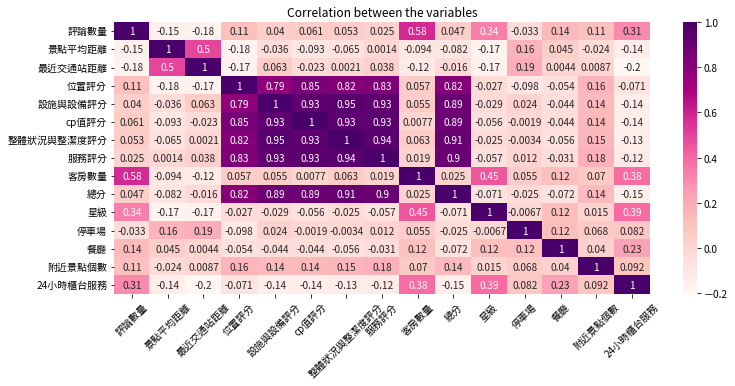

In [ ]:
import seaborn as sns
plt.subplots(figsize=(12,5))
r_correlation=new_x.corr()
sns.heatmap(r_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

In [ ]:
#萃取最重要的十五個features
feature_list = ['評論數量',
 '景點平均距離',
 '最近交通站距離',
 '客房數量',
 '總分',
 '星級',
 '停車場',
 '餐廳',
 '附近景點個數',
 '24小時櫃台服務']
new_x = df[feature_list].astype(float)
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.1, random_state=42)
x_subtrain, x_val, y_subtrain, y_val = train_test_split(x_train, y_train, test_size=(1/9), random_state=42)
x_train2 = preprocessing.scale(x_train)
x_subtrain2= preprocessing.scale(x_subtrain)
x_test2 = preprocessing.scale(x_test)
x_val2 = preprocessing.scale(x_val)
y_train2 = preprocessing.scale(y_train)
y_subtrain2= preprocessing.scale(y_subtrain)
y_test2 = preprocessing.scale(y_test)
y_val2 = preprocessing.scale(y_val)

# 進行knn **regressor**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import seaborn as sns
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
# https://blog.csdn.net/qq_41076797/article/details/102755904(gridserch參數參考)
# https://tw511.com/a/01/9384.html

In [ ]:
parameters = {
    'n_neighbors': [1,5,10,15,20,25,30,35,40,45,50,60,70,85,100],
    'weights':['distance'],
    'leaf_size' : [1,3,5],
    'p': [i for i in range(1, 6)]
}

regr = KNeighborsRegressor()
g_search = GridSearchCV(estimator = regr, param_grid = parameters, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
g_search.fit(x_train, y_train)
print(g_search.best_params_)

Fitting 10 folds for each of 225 candidates, totalling 2250 fits
{'leaf_size': 1, 'n_neighbors': 85, 'p': 1, 'weights': 'distance'}


In [ ]:
knn = g_search.best_estimator_
y_predict = knn.predict(x_test)
rmse= np.sqrt(mean_squared_error(y_test, y_predict))
mae= mean_absolute_error(y_test, y_predict)
print("RMSE for our testing dataset with tuning is : {:.2f}".format(rmse) )
print("MAE for our testing dataset with tuning is : {:.2f}".format(mae) )

RMSE for our testing dataset with tuning is : 1707.34
MAE for our testing dataset with tuning is : 840.29


**加上標準化的knn預測結果**

In [ ]:
parameters = {
    'n_neighbors': [1,5,10,15,20,25,30,35,40,45,50,60,70,85,100],
    'weights':['distance'],
    'leaf_size' : [1,3,5],
    'p': [i for i in range(1, 6)]
}

regr = KNeighborsRegressor()
g_search = GridSearchCV(estimator = regr, param_grid = parameters, cv = 7, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
g_search.fit(x_train2, y_train)
print(g_search.best_params_)

Fitting 7 folds for each of 225 candidates, totalling 1575 fits
{'leaf_size': 1, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


Text(0, 0.5, 'RMSE')

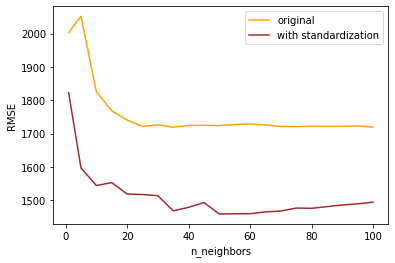

In [ ]:
n_neighbors=[1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
rmseset = []
rmseset2 = []
for i in range(len(n_neighbors)):
  regr = KNeighborsRegressor(n_neighbors=n_neighbors[i])
  regr.fit(x_train,y_train)
  y_predict = regr.predict(x_test)
  rmse= np.sqrt(mean_squared_error(y_test, y_predict))
  rmseset.append(rmse)
for i in range(len(n_neighbors)):
  regr = KNeighborsRegressor(n_neighbors=n_neighbors[i])
  regr.fit(x_train2,y_train)
  y_predict = regr.predict(x_test2)
  rmse= np.sqrt(mean_squared_error(y_test, y_predict))
  rmseset2.append(rmse)
import matplotlib.pyplot as plt
plt.plot(n_neighbors, rmseset,color = 'orange',label = 'original')
plt.plot(n_neighbors, rmseset2,color = 'brown', label = 'with standardization')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('RMSE')

In [ ]:
knn = g_search.best_estimator_
y_predict = knn.predict(x_test2)
rmse= np.sqrt(mean_squared_error(y_test, y_predict))
mae= mean_absolute_error(y_test, y_predict)

print("RMSE for our standardized testing dataset with tuning is : {:.2f}".format(rmse) )
print("MAE for our standardized testing dataset with tuning is : {:.2f}".format(mae) )



RMSE for our standardized testing dataset with tuning is : 1589.41
MAE for our standardized testing dataset with tuning is : 687.65


可以發現經過標準化後資料的knn預測結果較好，MAE甚至是最低的



# **Linear regression**  

似乎沒有參數式需要tune的

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize = True).fit(x_train, y_train)
y_predict = reg.predict(x_test)
rmse= np.sqrt(mean_squared_error(y_test, y_predict))
mae= mean_absolute_error(y_test, y_predict)
print("RMSE for our testing dataset with tuning is : {:.2f}".format(rmse) )
print("mae for our testing dataset with tuning is : {:.2f}".format(mae) )


RMSE for our testing dataset with tuning is : 1434.72
mae for our testing dataset with tuning is : 751.12


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [ ]:
# 經過標準化的資料特徵
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train2, y_train)
y_predict = reg.predict(x_test2)
rmse= np.sqrt(mean_squared_error(y_test, y_predict))
mae= mean_absolute_error(y_test, y_predict)
print("RMSE for our testing dataset with tuning is : {:.2f}".format(rmse) )
print("mae for our testing dataset with tuning is : {:.2f}".format(mae) )


RMSE for our testing dataset with tuning is : 1429.46
mae for our testing dataset with tuning is : 742.45


# **Lasso**

In [ ]:
from sklearn import linear_model
params = {'alpha': (np.logspace(-5, 5, 80))}
lasso = linear_model.Lasso(normalize=True)
lasso_model = GridSearchCV(estimator = lasso, param_grid = params, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
lasso_model.fit(x_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


GridSearchCV(cv=10, estimator=Lasso(normalize=True), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 1.33838875e-05, 1.79128445e-05, 2.39743497e-05,
       3.20870000e-05, 4.29448799e-05, 5.74769442e-05, 7.69264957e-05,
       1.02957557e-04, 1.37797236e-04, 1.84426271e-04, 2.46834047e-04,
       3.30359912e-04, 4.42149991e-04, 5.91768575e-04, 7.92016405e-04,
       1.06002585e-03, 1.41872...
       1.22633068e+02, 1.64130720e+02, 2.19670709e+02, 2.94004806e+02,
       3.93492726e+02, 5.26646239e+02, 7.04857404e+02, 9.43373222e+02,
       1.26260011e+03, 1.68984979e+03, 2.26167595e+03, 3.02700165e+03,
       4.05130497e+03, 5.42222101e+03, 7.25703961e+03, 9.71274020e+03,
       1.29994222e+04, 1.73982805e+04, 2.32856630e+04, 3.11652694e+04,
       4.17112461e+04, 5.58258627e+04, 7.47167068e+04, 1.00000000e+05])},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
print(lasso_model.best_params_)

{'alpha': 0.2693889309590175}


In [ ]:
lasso = lasso_model.best_estimator_
y_predict = lasso.predict(x_test)
rmse= np.sqrt(mean_squared_error(y_test, y_predict))
mae= mean_absolute_error(y_test, y_predict)
print("RMSE for our testing dataset with tuning is : {:.2f}".format(rmse) )
print("MAE for our testing dataset with tuning is : {:.2f}".format(mae) )

RMSE for our testing dataset with tuning is : 1436.51
MAE for our testing dataset with tuning is : 742.41


經過標準化資料的lasso

In [ ]:
params = {'alpha': (np.logspace(-5, 5, 80))}
lasso = linear_model.Lasso(normalize=True)
lasso_model2 = GridSearchCV(estimator = lasso, param_grid = params, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
lasso_model2.fit(x_train2, y_train)
print(lasso_model2.best_params_)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
{'alpha': 0.2693889309590175}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [ ]:
lasso = lasso_model2.best_estimator_
y_predict = lasso.predict(x_test2)
rmse= np.sqrt(mean_squared_error(y_test, y_predict))
mae= mean_absolute_error(y_test, y_predict)
print("RMSE for our standardized testing dataset with tuning is : {:.2f}".format(rmse) )
print("MAE for our standardized testing dataset with tuning is : {:.2f}".format(mae) )

RMSE for our standardized testing dataset with tuning is : 1434.54
MAE for our standardized testing dataset with tuning is : 735.75


# Ridge regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
params = {'alpha': (np.logspace(-5, 5, 80))}
ridge = Ridge(normalize=True)
ridge_model = GridSearchCV(estimator = ridge, param_grid = params, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
ridge_model.fit(x_train, y_train)
print(ridge_model.best_params_)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
{'alpha': 0.03501900461431713}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [ ]:
ridge = ridge_model.best_estimator_
y_predict = ridge.predict(x_test)
rmse= np.sqrt(mean_squared_error(y_test, y_predict))
mae= mean_absolute_error(y_test, y_predict)
print("RMSE for our testing dataset with tuning is : {:.2f}".format(rmse) )
print("MAE for our testing dataset with tuning is : {:.2f}".format(mae) )

RMSE for our testing dataset with tuning is : 1441.42
MAE for our testing dataset with tuning is : 742.36


經過標準化的資料

In [ ]:
params = {'alpha': (np.logspace(-5, 5, 80))}
ridge = Ridge(normalize=True)
ridge_model2 = GridSearchCV(estimator = ridge, param_grid = params, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
ridge_model2.fit(x_train2, y_train)
print(ridge_model.best_params_)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
{'alpha': 0.03501900461431713}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [ ]:
ridge2 = ridge_model2.best_estimator_
y_predict = ridge2.predict(x_test2)
rmse= np.sqrt(mean_squared_error(y_test, y_predict))
mae= mean_absolute_error(y_test, y_predict)
print("RMSE for our testing standadized dataset with tuning is : {:.2f}".format(rmse) )
print("MAE for our standadized testing dataset with tuning is : {:.2f}".format(mae) )

RMSE for our testing standadized dataset with tuning is : 1442.59
MAE for our standadized testing dataset with tuning is : 735.24


# Random Forest

Random Forest GridSearch CV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
parameters = {
    'n_estimators': [100, 150, 200, 250, 300, 350, 400, 500],
    'max_depth': [5,10,15,20,25,50,64,128,256],
    'n_jobs' : [-1]
}

regr = RandomForestRegressor(random_state=0)

g_search = GridSearchCV(regr, parameters,scoring='neg_mean_squared_error')
g_search.fit(x_train2, y_train)
print(g_search.best_params_)

{'max_depth': 20, 'n_estimators': 200, 'n_jobs': -1}


In [ ]:
rfg = RandomForestRegressor(n_estimators = 200, max_depth = 256, n_jobs = -1)
rfg.fit(x_train2,y_train)
rfg_ypred = rfg.predict(x_test2)
rfg_mse = mean_squared_error(y_test, rfg_ypred)
rfg_rmse = rfg_mse ** 0.5
print(rfg_rmse)

2909.680357860787


# XGBoost

XGBoost GridSearch CV

In [ ]:
import xgboost as xgb
from scipy.stats import uniform, randint

In [ ]:
def xgb_hyperParameterTuning(X_train, y_train):
    param_tuning = {
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [2, 3, 4, 5, 6],
        'min_child_weight': [1, 3, 5],
        "gamma": [0, 0.1, 0.3, 0.5, 0.6],
        'subsample': [0.5, 0.7],
        "colsample_bytree": [0.3, 0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = xgb.XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                param_grid = param_tuning,                        
                scoring = 'neg_mean_squared_error', #MSE
                cv = 5,
                n_jobs = -1,
                verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [ ]:
xgb_hyperParameterTuning(x_train2, y_train)

Fitting 5 folds for each of 4050 candidates, totalling 20250 fits


{'colsample_bytree': 0.3,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [ ]:
xgb_reg = xgb.XGBRegressor(objective = 'reg:squarederror',
               colsample_bytree = 0.3,
               learning_rate = 0.01,
               max_depth = 6,
               gamma = 0,
               min_child_weight = 5,
               n_estimators = 500,
               subsample = 0.7)


xgb_reg.fit(x_train2, y_train)
xgb_ypred = xgb_reg.predict(x_test2)
xgb_RMSE = np.sqrt( mean_squared_error(y_test, xgb_ypred) )

print(xgb_RMSE)

1522.4499024212896


#Gradient Boost

Gradient Boosting gridsearch CV

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
def gb_hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'n_estimators': [100, 200, 500, 1000],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': range(3,13,2), 
        'min_samples_split': range(400,1400,200),
        'min_samples_leaf': range(30,71,10),
        'subsample': [0.3, 0.5, 0.7, 0.9]
    }

    gb_model = GradientBoostingRegressor()

    gb_search = GridSearchCV(estimator = gb_model,
                param_grid = param_tuning,                        
                scoring = 'neg_mean_squared_error', #MSE
                cv = 5,
                n_jobs = -1,
                verbose = 1)

    gb_search.fit(x_train2,y_train)

    return gb_search.best_params_

In [ ]:
gb_hyperParameterTuning(x_train2, y_train)

Fitting 5 folds for each of 6000 candidates, totalling 30000 fits


{'learning_rate': 0.1,
 'max_depth': 11,
 'min_samples_leaf': 60,
 'min_samples_split': 400,
 'n_estimators': 200,
 'subsample': 0.9}

In [ ]:
gb_reg = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=9,
    min_samples_leaf=60,
    min_samples_split=400,
    subsample = 0.9
    )

gb_reg.fit(x_train2,y_train)
gb_ypred = gb_reg.predict(x_test2)
gb_RMSE = np.sqrt( mean_squared_error(y_test, gb_ypred) )

print(gb_RMSE)

1484.9707261612882


# **stacking**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model


In [ ]:
from sklearn.ensemble import StackingRegressor
estimators = [
    ('rf', RandomForestRegressor(n_estimators = 200, max_depth = 256, n_jobs = -1)),
    ('knn', KNeighborsRegressor(n_neighbors=100)),
    ('linear', LinearRegression(normalize = True)),
    ('lasso', linear_model.Lasso(normalize=True,alpha=0.08395578619995121)),
    ('reg', LinearRegression(normalize = True)),
    #('xgb_reg', xgb.XGBRegressor(objective = 'reg:squarederror',colsample_bytree = 0.3,learning_rate = 0.01,max_depth = 6,gamma = 0,min_child_weight = 5,n_estimators = 500,subsample = 0.7)),
    ('gb_reg', GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,
    max_depth=9,min_samples_leaf=60,min_samples_split=400,subsample = 0.9))]
clf = StackingRegressor(estimators=estimators, final_estimator= MLPRegressor(activation = "relu", alpha = 0.1, hidden_layer_sizes = (8,8),
                learning_rate = "constant", max_iter = 2000, random_state = 1000))
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
rmse= np.sqrt(mean_squared_error(y_test, y_predict))
mae= mean_absolute_error(y_test, y_predict)
print("RMSE for our testing dataset with tuning is : {:.2f}".format(rmse) )
print("MAE for our testing dataset with tuning is : {:.2f}".format(mae) )

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

RMSE for our testing dataset with tuning is : 1326.86
MAE for our testing dataset with tuning is : 644.67


In [ ]:
# TRAIN另外三個MODEL
gb_reg = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=9,
    min_samples_leaf=60,
    min_samples_split=400,
    subsample = 0.9
    )

gb_reg.fit(x_train,y_train)
gb_ypred = gb_reg.predict(x_test)
gb_RMSE = np.sqrt( mean_squared_error(y_test, gb_ypred) )
mae= mean_absolute_error(y_test, gb_ypred)

print('gb_RMSE',gb_RMSE)
print('gb_MAE',mae)

xgb_reg = xgb.XGBRegressor(objective = 'reg:squarederror',
               colsample_bytree = 0.3,
               learning_rate = 0.01,
               max_depth = 6,
               gamma = 0,
               min_child_weight = 5,
               n_estimators = 500,
               subsample = 0.7)


xgb_reg.fit(x_train, y_train)
xgb_ypred = xgb_reg.predict(x_test)
xgb_RMSE = np.sqrt( mean_squared_error(y_test, xgb_ypred) )
mae= mean_absolute_error(y_test, xgb_ypred)

print('xgb_RMSE',xgb_RMSE)
print('xgb_MAE',mae)

rfg = RandomForestRegressor(n_estimators = 200, max_depth = 256, n_jobs = -1)
rfg.fit(x_train,y_train)
rfg_ypred = rfg.predict(x_test)
rfg_mse = mean_squared_error(y_test, rfg_ypred)
rfg_rmse = rfg_mse ** 0.5
mae= mean_absolute_error(y_test, rfg_ypred)

print('RF_RMSE',rmse)
print('RF_MAE',mae)